<a href="https://colab.research.google.com/github/JosephHobbs9292/Project_One/blob/main/Project_One_Final_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Joseph Cobbs
--- 

In [ ]:
## importing libraries and mounting drive
## Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.tree import plot_tree

from sklearn import set_config
set_config(display='diagram')

Mounted at /content/drive


## Loading Data 
---

In [ ]:
## Load in dataset
df_sales = pd.read_csv("/content/sales_predictions (1).csv")
df_sales.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049 

In [ ]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning
---

In [ ]:
df_sales.shape


(8523, 12)

In [ ]:
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
df_sales.duplicated().sum()

0

In [ ]:
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are several options to handle missing data: deleteing the affected columns or row, creating new categories to replace missing values, or simply filling in the  missing data. Since the missing data accounts 1463 values in Item_Weight and 2410 values in Outlet_Size deleteing these rows or columns would lead too great of a data loss. Thus, I will replacing the data with the mean and median values respectively: 


In [ ]:
average = df_sales["Item_Weight"].mean()
print(average)

12.857645184135976


In [ ]:
median = df_sales["Outlet_Size"].value_counts().median
print(median)

<bound method NDFrame._add_numeric_operations.<locals>.median of Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64>


In [ ]:
df_sales["Item_Weight"].fillna(average, inplace = True)
df_sales["Item_Weight"].isna().sum()

0

In [ ]:
df_sales["Outlet_Size"].astype(str)
df_sales["Outlet_Size"].fillna("Medium", inplace = True)
df_sales["Outlet_Size"].isna().sum()

0

## Verifying that all columns have consistent categories
---

In [ ]:
df_sales["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df_sales.replace(["LF", "reg", "low fat"], ["Low Fat", "Regular", "Low Fat"], inplace = True)

In [ ]:
df_sales["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df_sales["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
df_sales["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
df_sales["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
df_sales["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

## Displaying descriptive statistics of numerical columns
---

In [ ]:
## Item_Weight
Item_Weight_Mean = df_sales["Item_Weight"].mean()
Item_Weight_Max = df_sales["Item_Weight"].max()
Item_Weight_Min = df_sales["Item_Weight"].min()
print(f"The Mean is: {Item_Weight_Mean}\nThe Max is: {Item_Weight_Max}\nThe Min is: {Item_Weight_Min}")

The Mean is: 12.857645184135976
The Max is: 21.35
The Min is: 4.555


In [ ]:
Item_Visibility_Mean = df_sales["Item_Visibility"].mean()
Item_Visibility_Max = df_sales["Item_Visibility"].max()
Item_Visibility_Min = df_sales["Item_Visibility"].min()
print(f"The Mean is: {Item_Visibility_Mean}\nThe Max is: {Item_Visibility_Max}\nThe Min is: {Item_Visibility_Min}")

The Mean is: 0.06613202877895108
The Max is: 0.328390948
The Min is: 0.0


In [ ]:
Item_MRP_Mean = df_sales["Item_MRP"].mean()
Item_MRP_Max = df_sales["Item_MRP"].max()
Item_MRP_Min = df_sales["Item_MRP"].min()
print(f"The Mean is: {Item_MRP_Mean}\nThe Max is: {Item_MRP_Max}\nThe Min is: {Item_MRP_Min}")

The Mean is: 140.9927819781767
The Max is: 266.8884
The Min is: 31.29


In [ ]:
Outlet_Establishment_Year_Mean = df_sales["Outlet_Establishment_Year"].mean()
Outlet_Establishment_Year_Max = df_sales["Outlet_Establishment_Year"].max()
Outlet_Establishment_Year_Min = df_sales["Outlet_Establishment_Year"].min()
print(f"The Mean is: {Outlet_Establishment_Year_Mean}\nThe Max is: {Outlet_Establishment_Year_Max}\nThe Min is: {Outlet_Establishment_Year_Min}")

The Mean is: 1997.8318667135984
The Max is: 2009
The Min is: 1985


In [ ]:
Item_Outlet_Sales_Mean = df_sales["Item_Outlet_Sales"].mean()
Item_Outlet_Sales_Max = df_sales["Item_Outlet_Sales"].max()
Item_Outlet_Sales_Min = df_sales["Item_Outlet_Sales"].min()
print(f"The Mean is: {Item_Outlet_Sales_Mean}\nThe Max is: {Item_Outlet_Sales_Max }\nThe Min is: {Item_Outlet_Sales_Min}")

The Mean is: 2181.288913575032
The Max is: 13086.9648
The Min is: 33.29


In [ ]:
df_sales["Item_Outlet_Sales"].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

## Data Visualization
----

In [ ]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


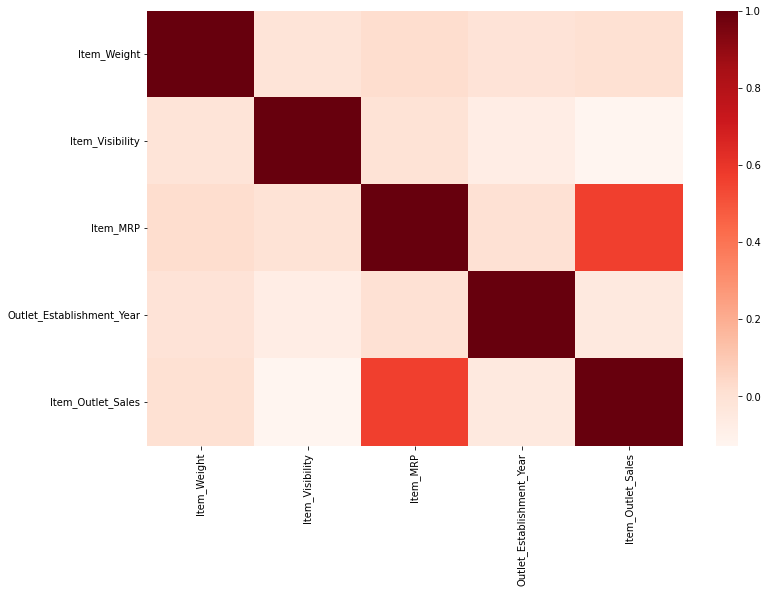

In [ ]:
## Theory to test: Are the older stores more established and efficient in their operations allowing them to sell on average more product.
df_groupedbyage = df_sales.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].mean()
corr = df_sales.corr()

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr, cmap = "Reds");

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


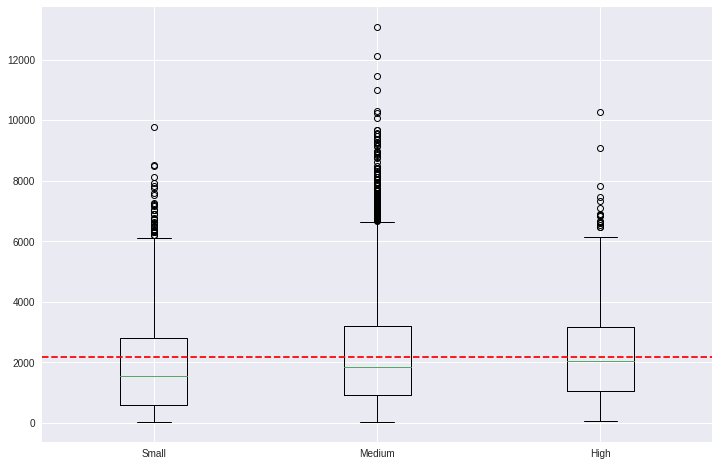

In [ ]:
## Creating a boxplot to compare the sales of the three different sizes of stores. 
df_small = df_sales["Outlet_Size"] == "Small"
df_small_filtered = df_sales.loc[df_small, "Item_Outlet_Sales"]

df_medium = df_sales["Outlet_Size"] == "Medium"
df_medium_filtered = df_sales.loc[df_medium, "Item_Outlet_Sales"]

df_large = df_sales["Outlet_Size"] == "High"
df_large_filtered = df_sales.loc[df_large, "Item_Outlet_Sales"]

mean = df_sales["Item_Outlet_Sales"].mean()

fig, ax = plt.subplots(figsize=(12,8));
plt.style.use('seaborn');
plt.boxplot([df_small_filtered, df_medium_filtered, df_large_filtered], labels = ["Small", "Medium", "High"]);
plt.axhline(y = mean, color = 'r', linestyle = '--')

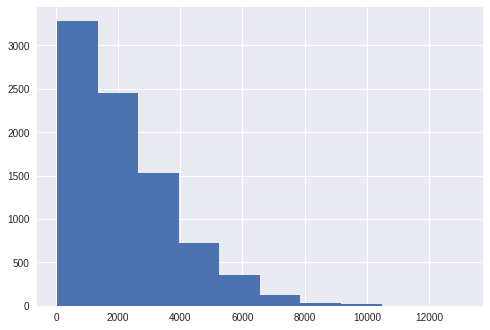

In [ ]:
## Simple histogram to show that the quantity of sales above 6k is very low. 
plt.style.use('seaborn')
df_sales["Item_Outlet_Sales"].hist();

##Regression Models

---

In [ ]:
## Spliting the data and running the train test split
X = df_sales[["Item_Weight", "Outlet_Establishment_Year", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type", "Item_Fat_Content", "Item_Visibility", "Item_Type", "Item_MRP"]].copy()
y = df_sales["Item_Outlet_Sales"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
## Creating the ordinal lists in order of least to most
size_labels = ["Small", "Medium", "High"]
outlet_location_type_labels = ["Tier 1", "Tier 2", "Tier 3"]
ordered_labels = [size_labels, outlet_location_type_labels]

ordinal = OrdinalEncoder(categories = ordered_labels)

In [ ]:
## Organizing columns
ordinal_columns = ["Outlet_Size", "Outlet_Location_Type"]
numerical_columns = ["Item_Weight", "Outlet_Establishment_Year", "Item_Visibility", "Item_MRP"]
nominal_columns = ["Item_Fat_Content", "Outlet_Type", "Item_Fat_Content", "Item_Type"]

In [ ]:
## Creating transformers 
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
missing_imputer = SimpleImputer(strategy='constant', fill_value='missing')

In [ ]:
## Creating pipelines
num_pipeline = make_pipeline(mean_imputer, scaler)
ord_pipeline = make_pipeline(freq_imputer, ordinal)
nom_pipelne = make_pipeline(missing_imputer, ohe)

In [ ]:
## Creating tuples 
ordinal_tuple = (ord_pipeline, ordinal_columns)
numerical_tuple = (num_pipeline, numerical_columns)
nominal_tuple = (nom_pipelne, nominal_columns)

In [ ]:
## Column transformer
preprocessor = make_column_transformer(ordinal_tuple, numerical_tuple, nominal_tuple, remainder='drop')
preprocessor.fit(X_train)

In [ ]:
## Linear regression model
reg = LinearRegression()
regression_pipeline = make_pipeline(preprocessor, reg)
regression_pipeline.fit(X_train, y_train)

In [ ]:
## Predictions 
regression_train = regression_pipeline.predict(X_train)
regression_test = regression_pipeline.predict(X_test)

In [ ]:
## Finding the RMSE
train_MSE = mean_squared_error(y_train, regression_train) 
test_MSE = mean_squared_error(y_test, regression_test)

train_RMSE = np.sqrt(train_MSE) 
test_RMSE = np.sqrt(test_MSE)
print(f'Model Training RMSE is: {train_RMSE}')
print(f'Model Testing RMSE is: {test_RMSE}')

In [ ]:
## Finding the r^2 value
train_r2 = r2_score(y_train, regression_train)
test_r2 = r2_score(y_test, regression_test)
print(f'Model Training r2 is: {train_r2}')
print(f'Model Testing r2 is: {test_r2}')

---
## Liner Regression Results

The model had extremely low variance, but unfortunately didn’t have low enough bias to be effective for making predictions. The results are likely overfitted and the model needs to introduce more variation in order to improve bias. 

---

In [ ]:
## Creating a decision tree model
dec_tree = DecisionTreeRegressor(max_depth = None, random_state = 42)
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
dec_tree_pipe.fit(X_train, y_train)

In [ ]:
## Iterating through models of different depths and adding the test/train results to a new dataframe to find the optimal depth
max_depth = dec_tree_pipe['decisiontreeregressor'].get_depth()
depths = range(1, max_depth+1)
scores = pd.DataFrame(columns=['Train Score', 'Test Score'], index=depths)

for depth in depths:

  dec_tree = DecisionTreeRegressor(max_depth=depth, random_state = 42)
  dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
  dec_tree_pipe.fit(X_train, y_train)

  train_pred = dec_tree_pipe.predict(X_train)
  test_pred = dec_tree_pipe.predict(X_test)

  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)

  scores.loc[depth, 'Train Score'] = train_r2score
  scores.loc[depth, 'Test Score'] = test_r2score

In [ ]:
## Displaying 5 best scores
sorted_scores = scores.sort_values(by='Test Score', ascending=False)

sorted_scores.head()

In [ ]:
## Creating a tuned decision tree model
dec_tree_tuned = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_pipe_tuned = make_pipeline(preprocessor, dec_tree_tuned)
dec_tree_pipe_tuned.fit(X_train, y_train)

In [ ]:
## Predictions for the tuned decision tree
dec_tree_train = dec_tree_pipe_tuned.predict(X_train) 
dec_tree_test = dec_tree_pipe_tuned.predict(X_test)


In [ ]:
## Calculating RMSE for the tuned decision tree
tree_train_MSE = mean_squared_error(y_train, dec_tree_train) 
tree_test_MSE = mean_squared_error(y_test, dec_tree_test)

tree_train_RMSE = np.sqrt(tree_train_MSE) 
tree_test_RMSE = np.sqrt(tree_test_MSE)
print(f'Model Training RMSE is: {tree_train_MSE}')
print(f'Model Testing RMSE is: {tree_test_MSE}')

In [ ]:
## Calculating r^2 for the tuned decision tree
tree_train_r2 = r2_score(y_train, dec_tree_train)
tree_test_r2 = r2_score(y_test, dec_tree_test)
print(f'Model Training r2 is: {tree_train_r2}')
print(f'Model Testing r2 is: {tree_test_r2}')

In [ ]:
---
## Regression Tree Results

The model had extremely low variance, but had slightly better bias than the regression analysis model. At 60% the perdictive power of the model is still relatively low, but can be useful. 

---

In [ ]:
--- 

## Model Selection 

Overall, the Regression Tree is the model I would reccomend. It's bias is 5% better while sacrificing only a increase in the amount of variance. 

---